In [ ]:
#find peaks
#1st method find  1 peak so cut the distribution in half/ not great 
#2nd method, with scipy peak sorter, can find the pwo peaks based on height, check with actual data if there is no false positive/ can select the two biggest values if needed I guess

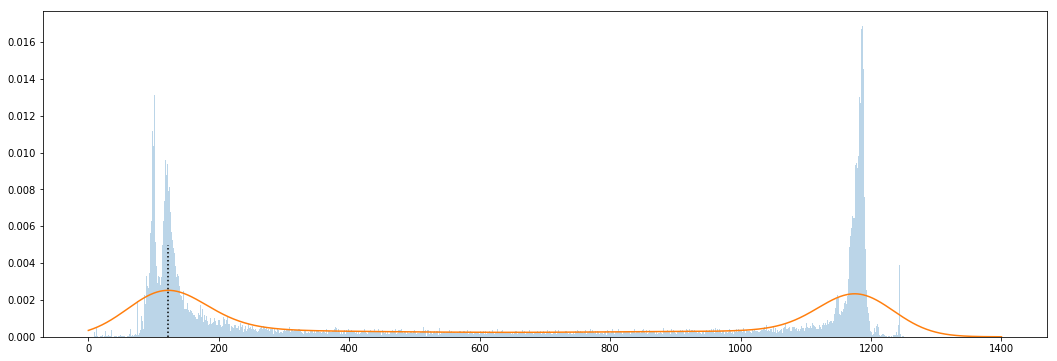

In [25]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = testarray
bins = np.arange(1400)

kde = stats.gaussian_kde(x)
xx = np.linspace(0, 1400, 1400)
fig, ax = plt.subplots(figsize=(18,6))
ax.hist(x, normed=True, bins=bins, alpha=0.3)
ax.plot(xx, kde(xx))


xline = [122.4, 122.4]
yline = [0, 0.005]
plt.plot(xline, yline, ":", color='k')

In [27]:
def estimate_maxima(data):

      kde = stats.gaussian_kde(data)

      no_samples = 14000

      samples = np.linspace(0, 1400, no_samples)
      probs = kde.evaluate(samples)
      maxima_index = probs.argmax()    
      maxima = samples[maxima_index]

      return maxima

In [28]:
estimate_maxima(testarray)

122.40874348167726

In [29]:
test1 = [i for i in testarray if i <= 1000]
test2 = [i for i in testarray if i >= 300]

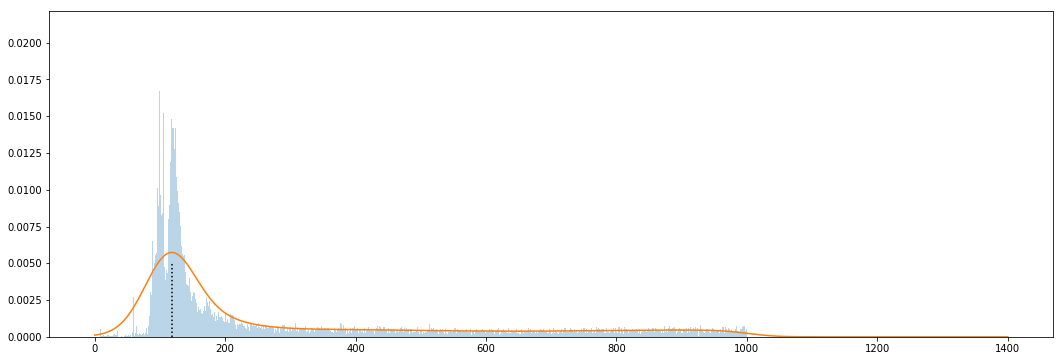

In [30]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = test1
bins = np.arange(1400)
esti = estimate_maxima(x)

kde = stats.gaussian_kde(x)
xx = np.linspace(0, 1400, 1400)
fig, ax = plt.subplots(figsize=(18,6))
ax.hist(x, normed=True, bins=bins, alpha=0.3)
ax.plot(xx, kde(xx))


xline = [esti, esti]
yline = [0, 0.005]
plt.plot(xline, yline, ":", color='k')

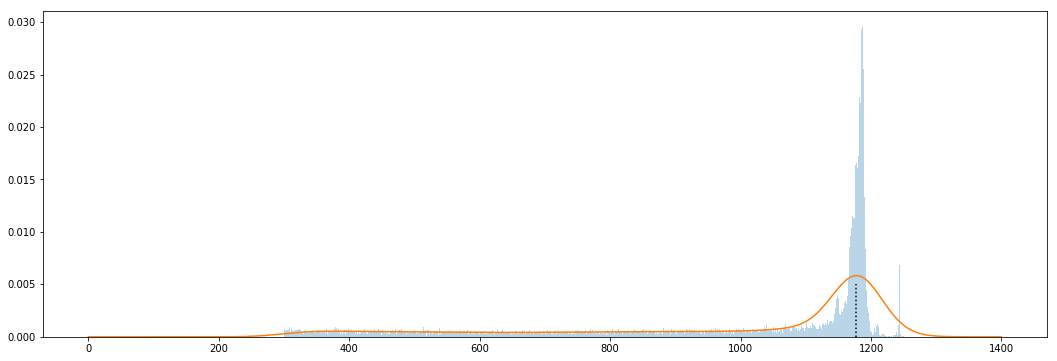

In [31]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = test2
bins = np.arange(1400)
esti = estimate_maxima(x)

kde = stats.gaussian_kde(x)
xx = np.linspace(0, 1400, 1400)
fig, ax = plt.subplots(figsize=(18,6))
ax.hist(x, normed=True, bins=bins, alpha=0.3)
ax.plot(xx, kde(xx))


xline = [esti, esti]
yline = [0, 0.005]
plt.plot(xline, yline, ":", color='k')

118.10843631687978 1177.5841131509394


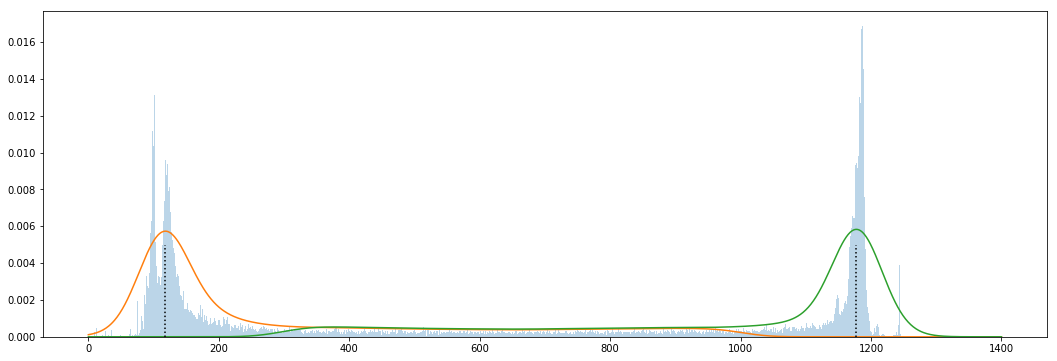

In [38]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


x = testarray
x1 = [i for i in x if i <= 1000]
x2 = [i for i in x if i >= 300]
bins = np.arange(1400)
esti1 = estimate_maxima(x1)
esti2 = estimate_maxima(x2)

kde1 = stats.gaussian_kde(x1)
kde2 = stats.gaussian_kde(x2)
xx = np.linspace(0, 1400, 1400)
fig, ax = plt.subplots(figsize=(18,6))
ax.hist(x, normed=True, bins=bins, alpha=0.3)
ax.plot(xx, kde1(xx))
ax.plot(xx, kde2(xx))


xline1 = [esti1, esti1]
xline2 = [esti2, esti2]
yline = [0, 0.005]
plt.plot(xline1, yline, ":", color='k')
plt.plot(xline2, yline, ":", color='k')
print(esti1, esti2)

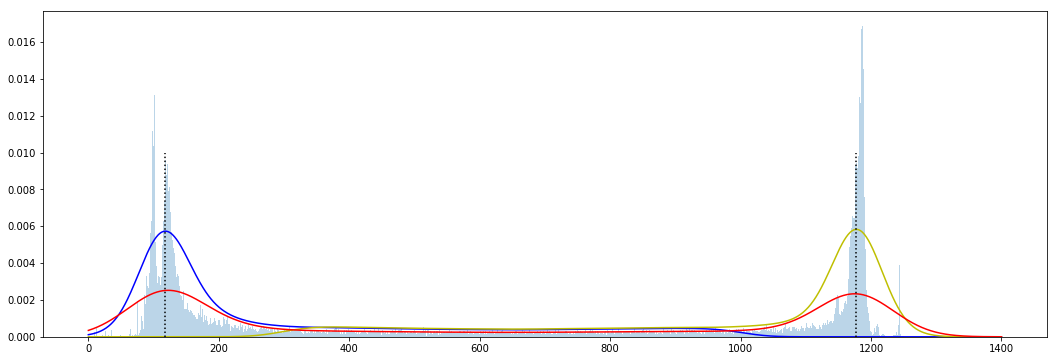

In [33]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


x = testarray
x1 = [i for i in x if i <= 1000]
x2 = [i for i in x if i >= 300]
bins = np.arange(1400)
esti1 = estimate_maxima(x1)
esti2 = estimate_maxima(x2)

kde = stats.gaussian_kde(x)
kde1 = stats.gaussian_kde(x1)
kde2 = stats.gaussian_kde(x2)
xx = np.linspace(0, 1400, 1400)
fig, ax = plt.subplots(figsize=(18,6))
ax.hist(x, normed=True, bins=bins, alpha=0.3)
ax.plot(xx, kde1(xx), color = 'b')
ax.plot(xx, kde2(xx), color = 'y')
ax.plot(xx, kde(xx), color = 'r')

xline1 = [esti1, esti1]
xline2 = [esti2, esti2]
yline = [0, 0.01]
plt.plot(xline1, yline, ":", color='k')
plt.plot(xline2, yline, ":", color='k')

### 2nd method

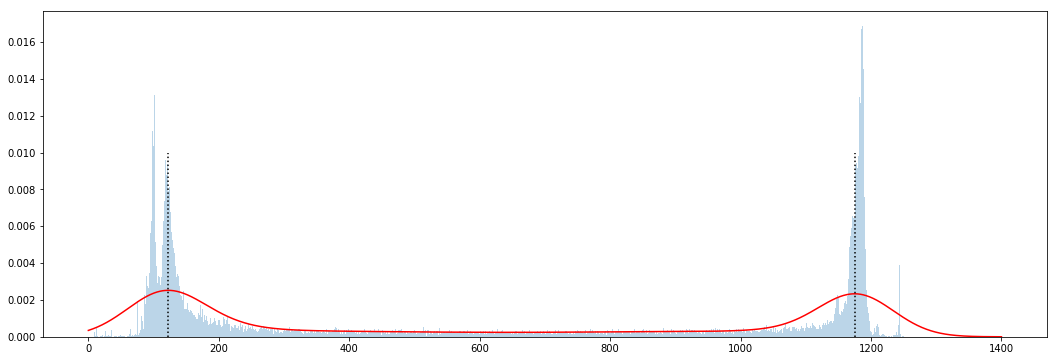

In [18]:
from scipy import stats
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
import pickle

infile = open('samplePosforPeaks','rb')
testarray = pickle.load(infile)
infile.close()

def estimate_maxima2(data, height = None):

      kde = stats.gaussian_kde(data)
      no_samples = 14000

      samples = np.linspace(0, 1400, no_samples)
      probs = kde.evaluate(samples)
      maxima_index = find_peaks(probs, height) 
      left = samples[maxima_index[0][0]]
      right = samples[maxima_index[0][1]]

      return left, right


x = testarray
bins = np.arange(1400)
esti1 = estimate_maxima2(x, height = 0.001)[0]
esti2 = estimate_maxima2(x, height = 0.001)[1]

kde = stats.gaussian_kde(x)
xx = np.linspace(0, 1400, 1400)
fig, ax = plt.subplots(figsize=(18,6))
ax.hist(x, normed=True, bins=bins, alpha=0.3)

ax.plot(xx, kde(xx), color = 'r')

xline1 = [esti1, esti1]
xline2 = [esti2, esti2]
yline = [0, 0.01]
plt.plot(xline1, yline, ":", color='k')
plt.plot(xline2, yline, ":", color='k')

In [ ]:
infile = open('samplePosforPeaks','rb')
testarray = pickle.load(infile)
infile.close()

def estimate_maxima2(data, height = None):

      kde = stats.gaussian_kde(data)
      no_samples = 14000

      samples = np.linspace(0, 1400, no_samples)
      probs = kde.evaluate(samples)
      maxima_index = find_peaks(probs, height) 
      left = samples[maxima_index[0][0]]
      right = samples[maxima_index[0][1]]

      return left, right


x = testarray
bins = np.arange(1400)
esti1 = estimate_maxima2(x, height = 0.001)[0]
esti2 = estimate_maxima2(x, height = 0.001)[1]

kde = stats.gaussian_kde(x)
xx = np.linspace(0, 1400, 1400)
fig, ax = plt.subplots(figsize=(3,6))
ax.hist(x, normed=True, bins=bins, alpha=0.3, orientation='horizontal')
ax.set_xlim(0.02, 0)

ax.plot(kde(xx), xx, color = 'r')

xline1 = [esti1, esti1]
xline2 = [esti2, esti2]
yline = [0, 0.01]

plt.plot(yline, xline1, ":", color='k')
plt.plot(yline, xline2, ":", color='k')